In [105]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# first, generate some data
# for a regression problem, we're going to want data with 
# some kind of linear trend
# will use np.linspace() for this

In [107]:
# from 0 to 100, with 50 points

x_lin = np.linspace(0,100,50)

x_lin

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

In [108]:
# from -10.5 to 10.5, with 50 points

noise = np.random.uniform(-10.5,10.5,50)

noise

array([ 5.88635301, -0.19506268,  0.97727353, -1.2965362 , -8.20546626,
        4.08269743,  1.30414712, -2.57863115,  6.08227822, -2.24014286,
       -6.78388407, -8.8119873 ,  2.41325874,  9.29716492, -7.76285091,
        5.60143316, -7.43251688,  8.32118106, -5.91079464, -2.2707249 ,
       -0.21072027,  3.99234952, -4.22682232,  9.94347673,  3.37840678,
        9.0962468 ,  5.33025043,  2.08110225,  3.63681503, -6.31528349,
        7.96685709, -0.30776639, -7.63681761,  2.94436386,  5.06309603,
        6.29605178,  0.22333172,  9.94322591,  5.2343869 ,  3.68772872,
        8.08442757,  5.20605329,  9.40511606, -5.86762933, -1.6525583 ,
        2.31781245, -6.80608477,  4.01375562, -4.55337953, -1.53662442])

In [109]:
X = x_lin + noise

X

array([ 5.88635301e+00,  1.84575365e+00,  5.05890618e+00,  4.82591278e+00,
       -4.22009583e-02,  1.42867791e+01,  1.35490451e+01,  1.17070831e+01,
        2.24088088e+01,  1.61272041e+01,  1.36242792e+01,  1.36369923e+01,
        2.69030547e+01,  3.58277772e+01,  2.08085777e+01,  3.62136781e+01,
        2.52205443e+01,  4.30150586e+01,  3.08238992e+01,  3.65047853e+01,
        4.06056063e+01,  4.68494924e+01,  4.06711369e+01,  5.68822522e+01,
        5.23579986e+01,  6.01166550e+01,  5.83914749e+01,  5.71831431e+01,
        6.07796722e+01,  5.28683900e+01,  6.91913469e+01,  6.29575397e+01,
        5.76693048e+01,  7.02913026e+01,  7.44508511e+01,  7.77246232e+01,
        7.36927195e+01,  8.54534300e+01,  8.27854073e+01,  8.32795655e+01,
        8.97170806e+01,  8.88795227e+01,  9.51194018e+01,  8.18874727e+01,
        8.81433601e+01,  9.41545471e+01,  8.70714663e+01,  9.99321230e+01,
        9.34058041e+01,  9.84633756e+01])

In [110]:
# same thing for y (condensed)

y_labels = np.linspace(0,100,50) + np.random.uniform(-10.5,10.5,50)

y_labels

array([-3.57492443,  4.17341151, -1.53292721, -2.78603539,  6.3262947 ,
       18.96908639,  9.84790158, 16.54263907,  8.99553766, 21.45568134,
       20.8642481 , 13.29682754, 15.95023689, 23.49581139, 20.19745372,
       40.18968818, 22.83291505, 40.45195264, 34.27221159, 29.19167603,
       30.56837762, 45.47143878, 36.46890587, 42.32235294, 40.82341232,
       60.31423372, 58.48863189, 55.40473254, 50.26072162, 64.09543334,
       69.99527363, 70.68923917, 65.68491433, 64.19231584, 74.09018066,
       79.15222366, 67.90347345, 69.25614301, 74.65465541, 80.55891465,
       90.54719144, 77.53087771, 89.57597217, 81.62512702, 89.82135847,
       95.85149654, 97.69174199, 92.36393989, 89.59053193, 98.75272641])

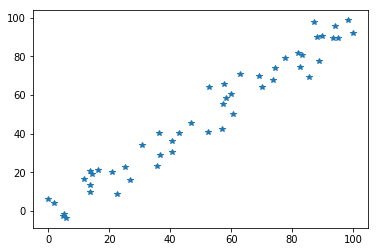

In [113]:
plt.plot(X, y_labels, '*')

In [ ]:
# cool! now we have linear-trending data with some noise in it

## modelling the equation: variables, step 1/2

a linear regressor looks for a predictive linear trend in data. we are solving for a line:

y = mx + b

we can model this equation pretty literally using tensorflow.

In [ ]:
# going to initialize 2 variables for m and b
# initializing them with random values

m = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

## cost function

In [ ]:
error = 0

# create a list of tuples

for x,y in zip(x, y_labels):
    
    # y_hat = predicted value
    
    y_hat = m * x + b
    
    # squaring the error emphasizes and punishes higher errors 
    
    error += (y - y_hat) **2

## optimizer

In [ ]:
# tf has a number of optimizers
# this example uses gradient descent, but could easily choose another
# 0.001 is a standard starting place for a learning rate

GrD_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

# optimizers have a number of methods attached to them
# like .minimize(value_to_be_minimized)

training = GrD_optimizer.minimize(error)

## initialization: variables, step 2/2

In [ ]:
initializer = tf.global_variables_initializer()

## run in a session


In [119]:
with tf.Session() as sess:
    
    # initialize variables
    
    sess.run(initializer)
    
    # number of training cycles (10 is not very many!)
    
    epochs = 10
    
    for i in range(epochs):
        
        # train model using our defined cost function & optimizer
        
        sess.run(training)
        
        # get results
        
        m_slope, b_intercept = sess.run([m,b])

In [120]:
m_slope

0.9284305

In [121]:
b_intercept

-0.14883037

## testing: the ocular patdown (i.e. let's take a look)

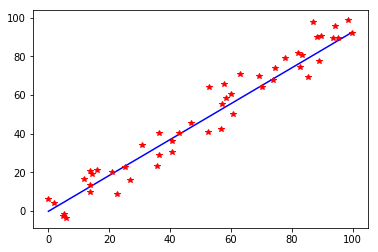

In [122]:
# to plot this, we need 
# a line for x that's the same length as our data and a linear distribution

x_test_line = np.linspace(0,100,50)

# y = mx + b

y_hat_plt = m_slope * x_test_line + b_intercept

# this will make a blue line

plt.plot(x_test_line, y_hat_plt, 'b')

# overlay original data
# this will plot with red '*' symbol

plt.plot(X, y_labels,'r*')

cool! it works, and we have a decently good fit to the data--particularly given only 10 training cycles (epochs).

would more epochs == better fit? let's see:

In [123]:
# test number 2: this time with more training cycles (epochs)

with tf.Session() as sess:
    
    sess.run(initializer)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(training)
        
        # get back results
        
        slope, intercept = sess.run([m,b])

In [124]:
print(slope, '\n')

print(intercept)

0.86332077 

0.3565344


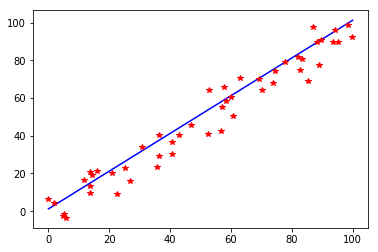

In [127]:
# still have x_test_line from above

y_hat_plt2 = slope + x_test_line + intercept

plt.plot(x_test_line, y_hat_plt2, 'b')
plt.plot(X, y_labels, 'r*')

that looks like a slightly closer fit.

## conclusion

this has been a really simple implementation of a regressor in tensorflow. the data here is a little unrealistic and is intended for demonstration and practice purposes only. it aims to give a working idea of how the moving parts in tensorflow work together to create a basic model.